In [34]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

In [4]:
# Load and inspect dataset
data = pd.read_csv('../data/clean_data.csv')

In [5]:
# Assuming the last column is the target variable, split dataset into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log Reg

In [54]:
# Define the logistic regression model and parameter grid for GridSearch
log_reg = LogisticRegression(max_iter=10000)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2'],
}

In [55]:
# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='roc_auc')

In [56]:
# Get the best model from grid search
best_log_reg = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)


Best parameters from GridSearchCV:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [57]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/logreg_model.pkl'
joblib.dump(best_log_reg, best_model_path)

['../models/logreg_model.pkl']

In [58]:
# Make predictions and evaluate the model
y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

In [59]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Model Performance:
Accuracy: 0.84
Precision: 0.58
Recall: 0.19
ROC-AUC: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     18300
           1       0.58      0.19      0.28      3778

    accuracy                           0.84     22078
   macro avg       0.71      0.58      0.59     22078
weighted avg       0.81      0.84      0.80     22078



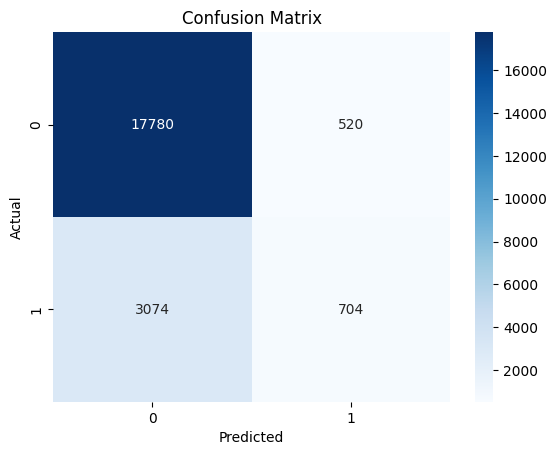

In [60]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

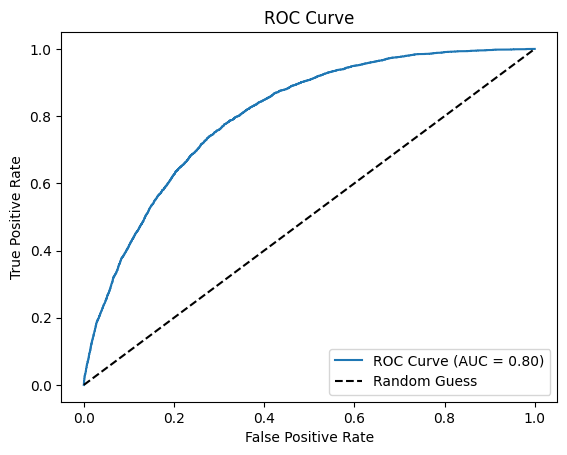

In [61]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

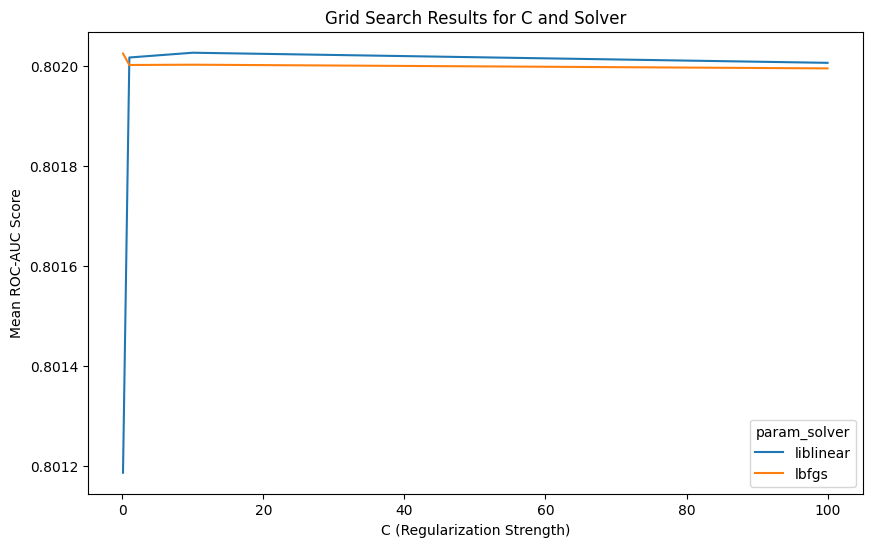

In [62]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_C', y='mean_test_score', hue='param_solver')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for C and Solver')
plt.show()

# DT

In [63]:
# Define the Decision Tree model and parameter grid for GridSearch
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [64]:
# Set up GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [65]:
# Get the best model from grid search
best_dt_classifier = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)


Best parameters from GridSearchCV:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [66]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/dt_model.pkl'
joblib.dump(best_dt_classifier, best_model_path)

['../models/dt_model.pkl']

In [67]:
# Make predictions and evaluate the model
y_pred = best_dt_classifier.predict(X_test)
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]

In [68]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.84
Precision: 0.58
Recall: 0.13
ROC-AUC: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     18300
           1       0.58      0.13      0.22      3778

    accuracy                           0.84     22078
   macro avg       0.71      0.56      0.56     22078
weighted avg       0.80      0.84      0.79     22078



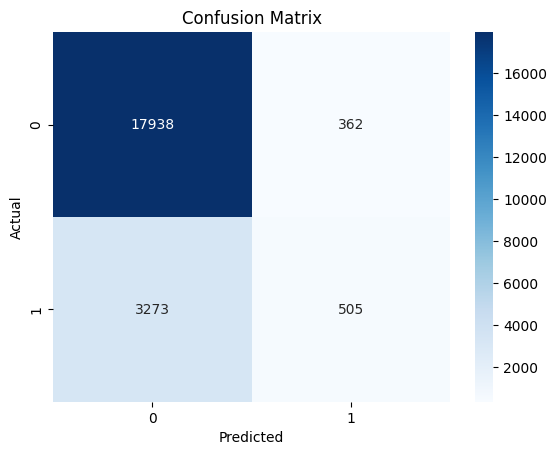

In [69]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

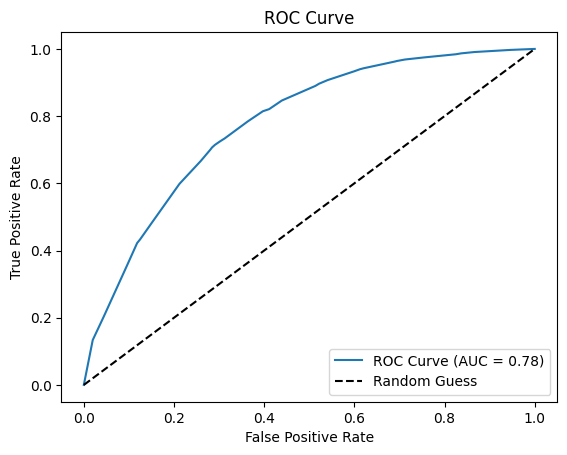

In [70]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

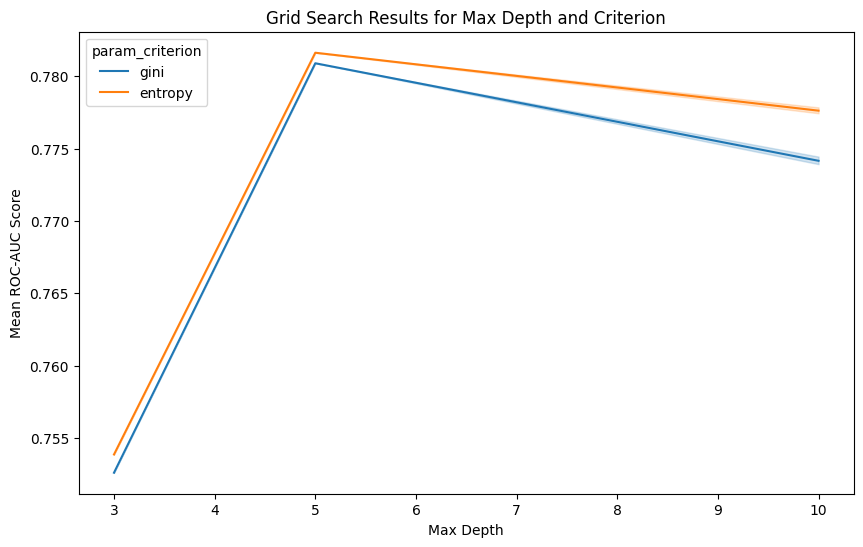

In [71]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_max_depth', y='mean_test_score', hue='param_criterion')
plt.xlabel('Max Depth')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for Max Depth and Criterion')
plt.show()

# RF

In [ ]:
# Define the Random Forest model and parameter grid for GridSearch
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Get the best model from grid search
best_rf_classifier = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/rf_model.pkl'
joblib.dump(best_rf_classifier, best_model_path)

In [ ]:
# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(X_test)
y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_test_score', hue='param_criterion')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for Number of Estimators and Criterion')
plt.show()

# SVM

In [72]:
# Define the SVM model and parameter grid for GridSearch
svc = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best model from grid search
best_svc = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/svc_model.pkl'
joblib.dump(best_svc, best_model_path)

In [ ]:
# Make predictions and evaluate the model
y_pred = best_svc.predict(X_test)
y_prob = best_svc.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_C', y='mean_test_score', hue='param_kernel')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for C and Kernel')
plt.show()

# NV

In [ ]:
# Define the Naive Bayes model (GaussianNB) and parameter grid for GridSearch
nb_classifier = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Smoothing parameter range for tuning
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best model from grid search
best_nb_classifier = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/nb_model.pkl'
joblib.dump(best_nb_classifier, best_model_path)

In [ ]:
# Make predictions and evaluate the model
y_pred = best_nb_classifier.predict(X_test)
y_prob = best_nb_classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_var_smoothing', y='mean_test_score')
plt.xlabel('Variance Smoothing')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for Variance Smoothing')
plt.xscale('log')
plt.show()

# KNN

In [ ]:
# Define the KNN model and parameter grid for GridSearch
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best model from grid search
best_knn_classifier = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/knn_model.pkl'
joblib.dump(best_knn_classifier, best_model_path)

In [ ]:
# Make predictions and evaluate the model
y_pred = best_knn_classifier.predict(X_test)
y_prob = best_knn_classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_n_neighbors', y='mean_test_score', hue='param_weights')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for Number of Neighbors and Weights')
plt.show()

# xgboost

In [45]:
# Define the XGBoost model and parameter grid for GridSearch
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [46]:
# Set up GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [23:40:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc')

In [47]:
# Get the best model from grid search
best_xgb_classifier = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)


Best parameters from GridSearchCV:
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [48]:
# Sauvegarder le meilleur modèle
best_model_path = '../models/xgb_model.pkl'
joblib.dump(best_xgb_classifier, best_model_path)

['../models/xgb_model.pkl']

In [49]:
# Make predictions and evaluate the model
y_pred = best_xgb_classifier.predict(X_test)
y_prob = best_xgb_classifier.predict_proba(X_test)[:, 1]

In [50]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.84
Precision: 0.58
Recall: 0.18
ROC-AUC: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     18300
           1       0.58      0.18      0.27      3778

    accuracy                           0.84     22078
   macro avg       0.71      0.58      0.59     22078
weighted avg       0.80      0.84      0.80     22078



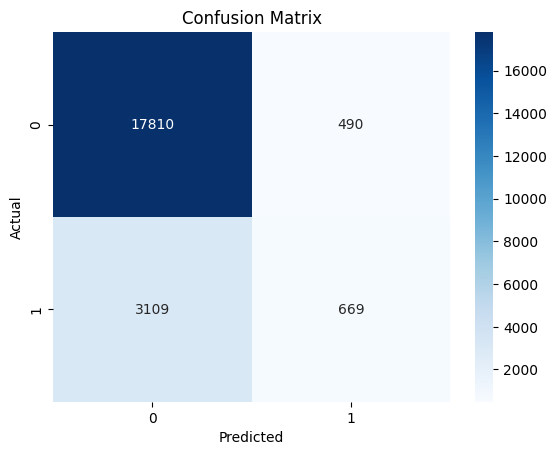

In [51]:
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

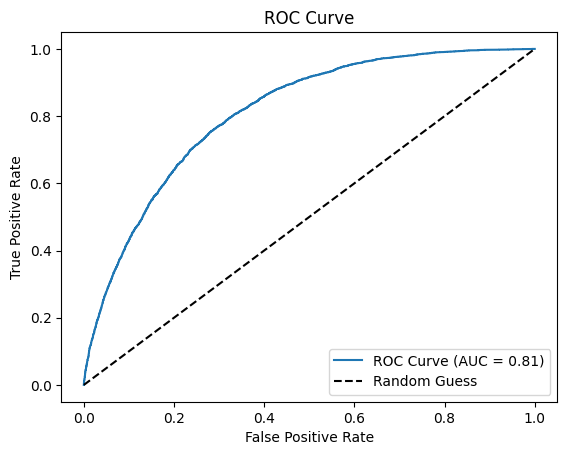

In [52]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

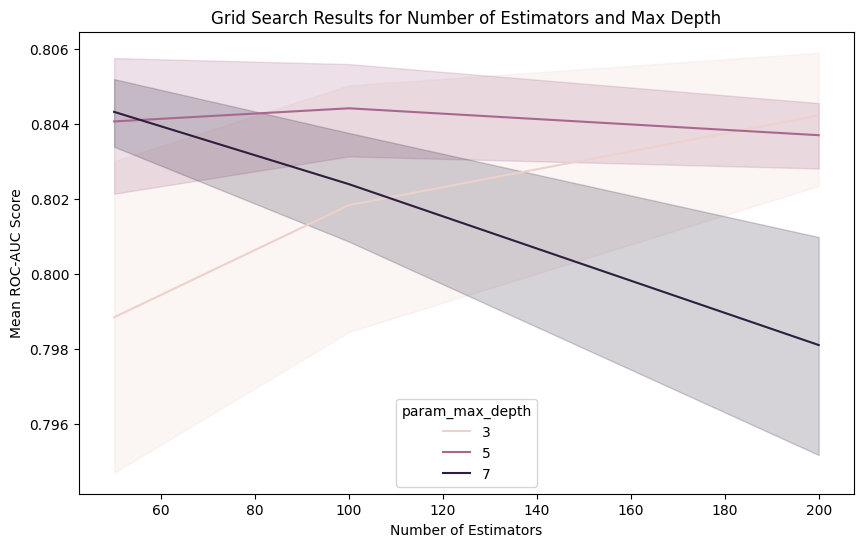

In [53]:
# 3. GridSearchCV results for parameter tuning
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_test_score', hue='param_max_depth')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean ROC-AUC Score')
plt.title('Grid Search Results for Number of Estimators and Max Depth')
plt.show()

# tensorflow

In [35]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Define a simple deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [37]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8446 - loss: 0.3557 - val_accuracy: 0.8335 - val_loss: 0.3723
Epoch 2/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8453 - loss: 0.3520 - val_accuracy: 0.8338 - val_loss: 0.3741
Epoch 3/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8456 - loss: 0.3514 - val_accuracy: 0.8310 - val_loss: 0.3737
Epoch 4/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8471 - loss: 0.3486 - val_accuracy: 0.8317 - val_loss: 0.3735
Epoch 5/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8450 - loss: 0.3535 - val_accuracy: 0.8331 - val_loss: 0.3734
Epoch 6/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8421 - loss: 0.3568 - val_accuracy: 0.8344 - val_loss: 0.3735
Epoch 7/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8446 - loss: 0.3504 - val_accuracy: 0.8344 - val_loss: 0.3739
Epoch 8/10
2208/2208 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8452 - loss: 0.3502 - 

In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.8321 - loss: 0.3776
Test Loss: 0.37236714363098145, Test Accuracy: 0.8336352705955505


In [44]:
# Save the entire model
model.save('../models/tfmodel.keras')